In [ ]:
!pip install transformer_lens

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.0/192.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:0

In [ ]:
!huggingface-cli login --token

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
The token `b` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `b`


In [ ]:
from transformer_lens import HookedTransformer
from transformer_lens.hook_points import HookPoint
import einops
import numpy as np
import torch as t
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

MODEL_NAME = 'meta-llama/Llama-3.2-3B'
SHORT_PROMPT = "The sale ends today. You won't want to miss it!"
LONG_PROMPT = "There once was a traveler named Joe who had been to every country in the world. He kept a journal of his adventures. He knew many languages and had tried many different cuisines. When Joe reached the old age of 96, he died. The end."

model: HookedTransformer = HookedTransformer.from_pretrained(MODEL_NAME)
model = model.to('cuda')
model.to_str_tokens("Check for bos token")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/844 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Loaded pretrained model meta-llama/Llama-3.2-3B into HookedTransformer
Moving model to device:  cuda


['<|begin_of_text|>', 'Check', ' for', ' bos', ' token']

In [ ]:
model.cfg

HookedTransformerConfig:
{'NTK_by_parts_factor': 32.0,
 'NTK_by_parts_high_freq_factor': 4.0,
 'NTK_by_parts_low_freq_factor': 1.0,
 'NTK_original_ctx_len': 8192,
 'act_fn': 'silu',
 'attention_dir': 'causal',
 'attn_only': False,
 'attn_scale': 11.313708498984761,
 'attn_scores_soft_cap': -1.0,
 'attn_types': None,
 'checkpoint_index': None,
 'checkpoint_label_type': None,
 'checkpoint_value': None,
 'd_head': 128,
 'd_mlp': 8192,
 'd_model': 3072,
 'd_vocab': 128256,
 'd_vocab_out': 128256,
 'decoder_start_token_id': None,
 'default_prepend_bos': True,
 'device': 'cuda',
 'dtype': torch.float32,
 'eps': 1e-05,
 'experts_per_token': None,
 'final_rms': True,
 'from_checkpoint': False,
 'gated_mlp': True,
 'init_mode': 'gpt2',
 'init_weights': False,
 'initializer_range': 0.014433756729740645,
 'load_in_4bit': False,
 'model_name': 'Llama-3.2-3B',
 'n_ctx': 2048,
 'n_devices': 1,
 'n_heads': 24,
 'n_key_value_heads': 8,
 'n_layers': 28,
 'n_params': 3170893824,
 'normalization_type': '

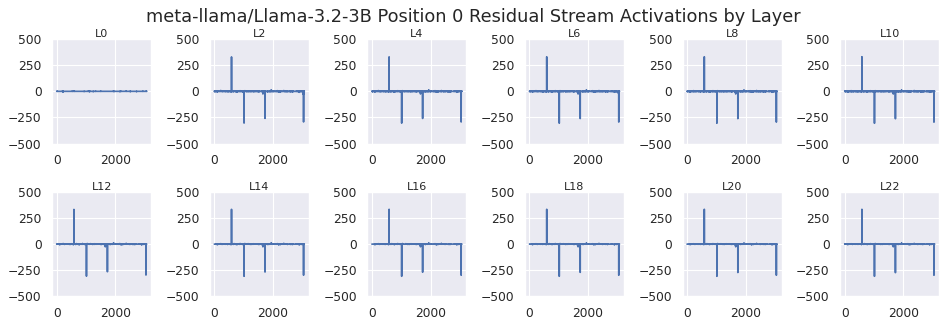

In [ ]:
acts = []
def hook(activation, hook: HookPoint):
    acts.append(activation[0].detach().cpu().numpy())
filter = lambda name: name.endswith("resid_post")
model.run_with_hooks(
    [''],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

# Assume `data` has shape (N, T)
n_rows = 2
fig, axes = plt.subplots(n_rows, 6, figsize=(12, 4), dpi=80)
axes = axes.flatten()  # flatten in case of a single row

pos = 0
for i, act in enumerate(acts):
    if i%2==0 and i <24:
      ax = axes[i//2]
      ax.plot(act[pos])
      ax.set_title(f"L{i}", fontsize=10, pad=2)
      ax.set_ylim(-500, 500)

# Remove any empty subplots
for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
fig.suptitle(f'{MODEL_NAME} Position 0 Residual Stream Activations by Layer', fontsize=16, y=1.02)
plt.show()

In [ ]:
MASSIVE_ACT_DIM = np.where(acts[21][0]>250)[0][0]
print(f"massive act: {MASSIVE_ACT_DIM}")

massive act: 588


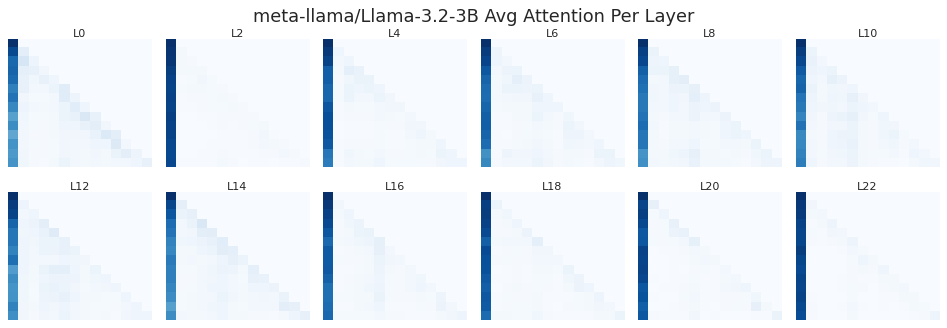

In [ ]:
acts = []
def hook(activation, hook: HookPoint):
    acts.append(activation[0].detach().cpu().numpy())
filter = lambda name: name.endswith("attn.hook_pattern")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

n_rows = 2
fig, axes = plt.subplots(n_rows, 6, figsize=(12, 4), dpi=80)
axes = axes.flatten()

pos = 0
for i, act in enumerate(acts):
    if i%2==0 and i<24:
      ax = axes[i//2]
      im = ax.imshow(acts[i].mean(0), aspect='auto', cmap='Blues', vmin=0, vmax=1)
      ax.set_title(f"L{i}", fontsize=10, pad=2)
      ax.axis('off')

for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
fig.suptitle(f'{MODEL_NAME} Avg Attention Per Layer', fontsize=16, y=1.02)
plt.show()

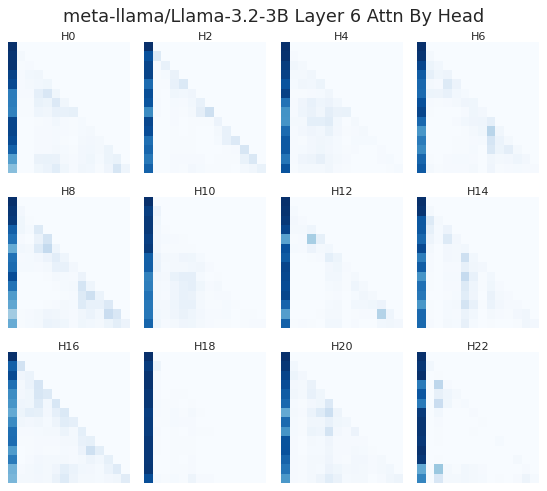

In [ ]:
acts = []
def hook(activation, hook: HookPoint):
    acts.append(activation[0].detach().cpu().numpy())
filter = lambda name: name.endswith("attn.hook_pattern")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

layer_view = 6
num_heads = acts[layer_view].shape[0]
n_rows = ((num_heads + 2) // 4)//2
fig, axes = plt.subplots(n_rows, 4, figsize=(7, 2 * n_rows), dpi=80)
axes = axes.flatten()

pos = 0
for i in range(0,num_heads,2):
    ax = axes[i//2]
    im = ax.imshow(acts[layer_view][i], aspect='auto', cmap='Blues', vmin=0, vmax=1)
    ax.set_title(f"H{i}", fontsize=10, pad=2)
    ax.axis('off')

# Remove any empty subplots
for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME} Layer {layer_view} Attn By Head", fontsize=16, y=1.02)
plt.show()

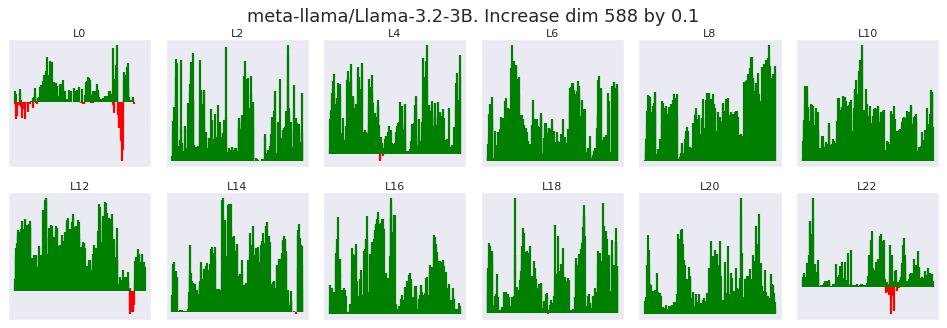

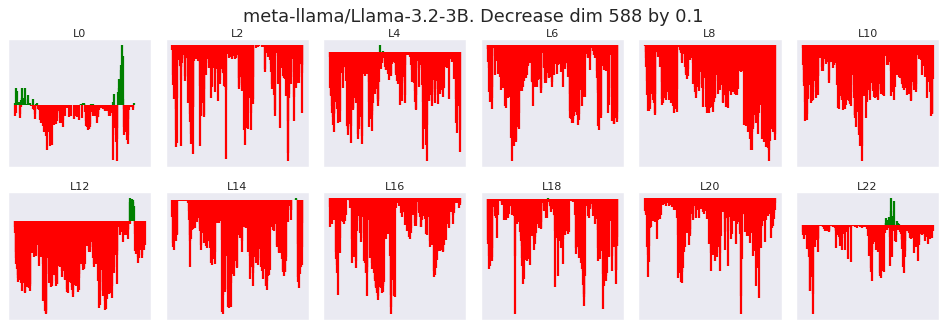

In [ ]:
#try incrementing MASSIVE_ACT_DIM slightly in residual stream, then measure impact in next attention layer.
acts_base = []
q_base = []
k_base = []
def hook(activation, hook: HookPoint):
  if hook.name.endswith("attn.hook_pattern"):
    acts_base.append(activation[0, :, :, 0].detach().cpu().numpy())
  elif hook.name.endswith("hook_k"):
    k_base.append(activation[0, 0, :, :].detach().cpu().numpy())
  else:
    q_base.append(activation[0, :, :, :].detach().cpu().numpy())

filter = lambda name: name.endswith("attn.hook_pattern") or name.endswith(f"attn.hook_q") or name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

acts_up = []
k_up = []
def hook(activation, hook: HookPoint):
    if hook.name.endswith("attn.hook_pattern"):
      acts_up.append(activation[0, :, :, 0].detach().cpu().numpy())
    elif hook.name.endswith("hook_normalized"):
      activation[0,0,MASSIVE_ACT_DIM] += 0.1
    else:
      k_up.append(activation[0, 0, :, :].detach().cpu().numpy())

for i in range(model.cfg.n_layers):
  full_filter = lambda name: name.endswith(f"blocks.{i}.attn.hook_pattern") or name.endswith(f"blocks.{i}.ln1.hook_normalized") or name.endswith(f"blocks.{i}.attn.hook_k")
  model.run_with_hooks(
      [SHORT_PROMPT],
      return_type=None,
      fwd_hooks=[(full_filter, hook)],
  )

acts_down = []
k_down = []
def hook(activation, hook: HookPoint):
    if hook.name.endswith("attn.hook_pattern"):
      acts_down.append(activation[0, :, :, 0].detach().cpu().numpy())
    elif hook.name.endswith("hook_normalized"):
      activation[0,0,MASSIVE_ACT_DIM] -= 0.1
    else:
      k_down.append(activation[0, 0, :, :].detach().cpu().numpy())

for i in range(model.cfg.n_layers):
  full_filter = lambda name: name.endswith(f"blocks.{i}.attn.hook_pattern") or name.endswith(f"blocks.{i}.ln1.hook_normalized") or name.endswith(f"blocks.{i}.attn.hook_k")
  model.run_with_hooks(
      [SHORT_PROMPT],
      return_type=None,
      fwd_hooks=[(full_filter, hook)],
  )

acts = [(acts_up[i]-acts_base[i]).flatten() for i in range(model.cfg.n_layers)]

n_rows = 2
fig, axes = plt.subplots(n_rows, 6, figsize=(12, 4), dpi=80)
axes = axes.flatten()

for i, act in enumerate(acts):
    if i%2==0 and i<24:
      ax = axes[i//2]
      ax.set_title(f"L{i}", fontsize=10, pad=2)
      for i, y in enumerate(act):
        color = 'green' if y >= 0 else 'red'
        ax.vlines(x=i, ymin=0, ymax=y, color=color, linewidth=2)
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
# Remove any empty subplots
for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.suptitle(f"{MODEL_NAME}. Increase dim {MASSIVE_ACT_DIM} by 0.1", fontsize=16, y=1.02)
plt.show()

acts = [(acts_down[i]-acts_base[i]).flatten() for i in range(model.cfg.n_layers)]

n_rows = 2
fig, axes = plt.subplots(n_rows, 6, figsize=(12, 4), dpi=80)
axes = axes.flatten()

for i, act in enumerate(acts):
  if i%2==0 and i<24:
    ax = axes[i//2]
    ax.set_title(f"L{i}", fontsize=10, pad=2)
    for i, y in enumerate(act):
      color = 'green' if y >= 0 else 'red'
      ax.vlines(x=i, ymin=0, ymax=y, color=color, linewidth=2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Remove any empty subplots
for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME}. Decrease dim {MASSIVE_ACT_DIM} by 0.1", fontsize=16, y=1.02)
plt.show()

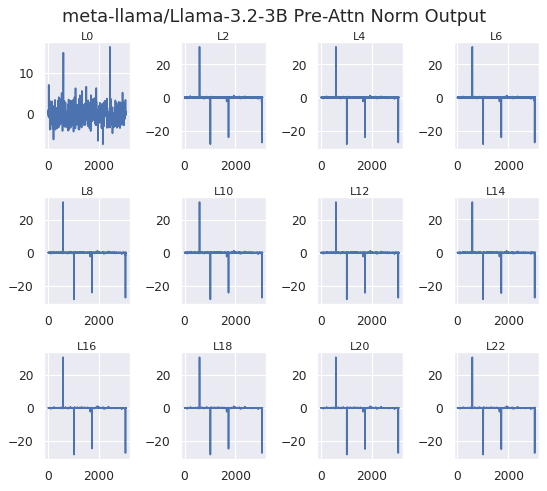

In [ ]:
acts = []
processed_hooks = []
def hook(activation, hook: HookPoint):
    if hook.name not in processed_hooks:
      acts.append(activation[0].detach().cpu().numpy())
    processed_hooks.append(hook.name)
filter = lambda name: name.endswith('ln1.hook_normalized')
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

n_rows = (len(acts)//2 + 2) // 4-1
fig, axes = plt.subplots(n_rows, 4, figsize=(7, 2 * n_rows), dpi=80)
axes = axes.flatten()

pos = 0
for i, act in enumerate(acts):
  if i%2==0 and i<24:
    ax = axes[i//2]
    ax.plot(act[pos])
    ax.set_title(f"L{i}", fontsize=10, pad=2)

# Remove any empty subplots
for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME} Pre-Attn Norm Output", fontsize=16, y=1.02)
plt.show()

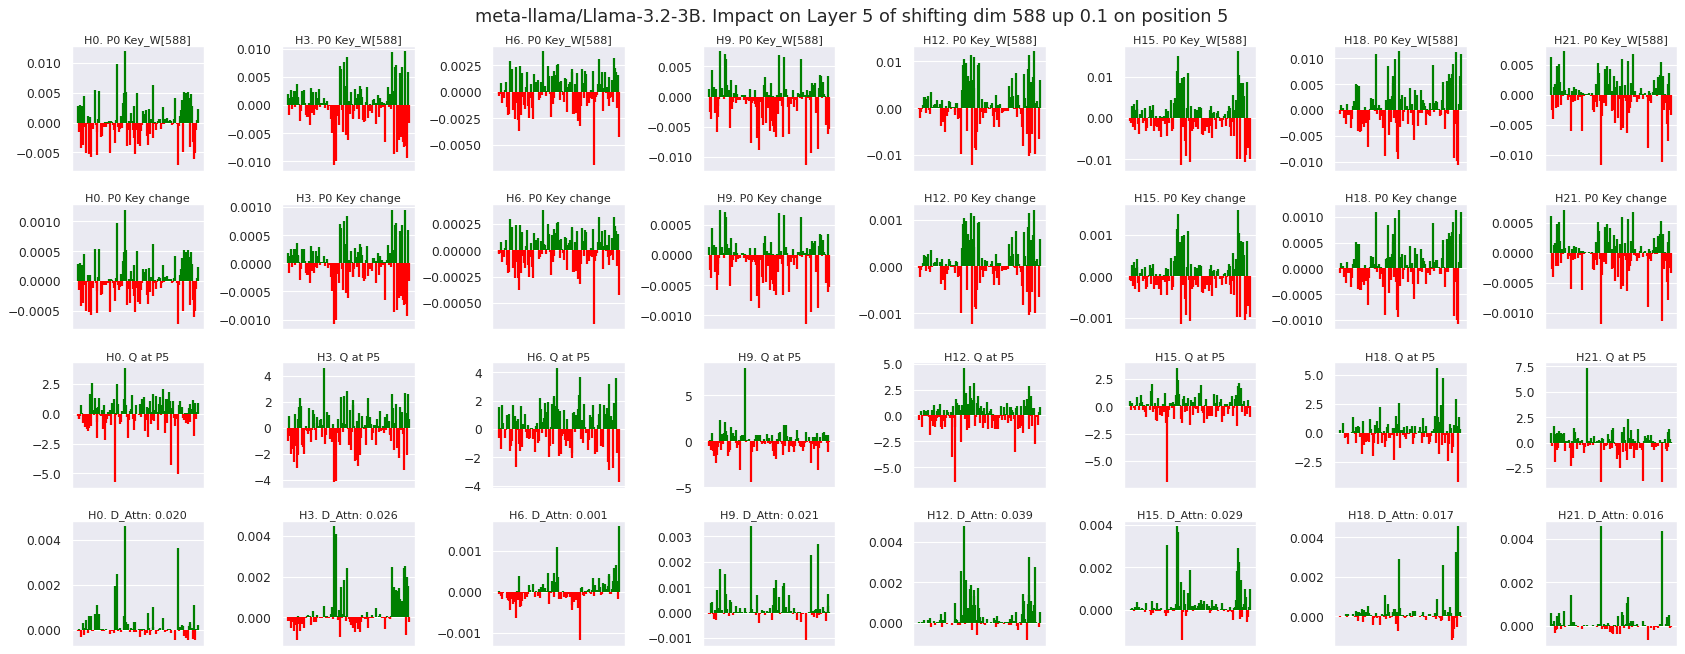

In [ ]:
position=5
layer = 5

qs = []
def hook(activation, hook: HookPoint):
    qs.append(activation[0][:, ::3, :] .detach().cpu().numpy())
filter = lambda name: name.endswith(f"blocks.{layer}.attn.hook_q")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)
qs = qs[0][position]

for n,v in model.named_parameters():
  if n==f'blocks.{layer}.attn._W_K':
    break
weights = v.detach().cpu()[:,MASSIVE_ACT_DIM,:]
acts = k_up[layer]-k_base[layer]
acts = t.tensor(acts)
impact = acts*qs

acts = np.concatenate([weights, acts, qs, impact])

n_cols=8
n_rows = (len(acts) + 2) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(21, 2 * n_rows), dpi=80)
axes = axes.flatten()
for i, act in enumerate(acts):
    ax = axes[i]
    if i<8:
      ax.set_title(f"H{(3*i)%24}. P0 Key_W[{MASSIVE_ACT_DIM}]", fontsize=10, pad=2)
    elif i<16:
      ax.set_title(f"H{(3*i)%24}. P0 Key change", fontsize=10, pad=2)
    elif i<24:
      ax.set_title(f"H{(3*i)%24}. Q at P5", fontsize=10, pad=2)
    else:
      total = sum(act)
      ax.set_title(f"H{(3*i)%24}. D_Attn: {total:.3f}", fontsize=10, pad=2)
    for i, y in enumerate(act):
      color = 'green' if y >= 0 else 'red'
      ax.vlines(x=i, ymin=0, ymax=y, color=color, linewidth=2)
    ax.get_xaxis().set_visible(False)

# Remove any empty subplots
for j in range(len(acts), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME}. Impact on Layer {layer} of shifting dim {MASSIVE_ACT_DIM} up 0.1 on position {position}", fontsize=16, y=1.02)
plt.show()

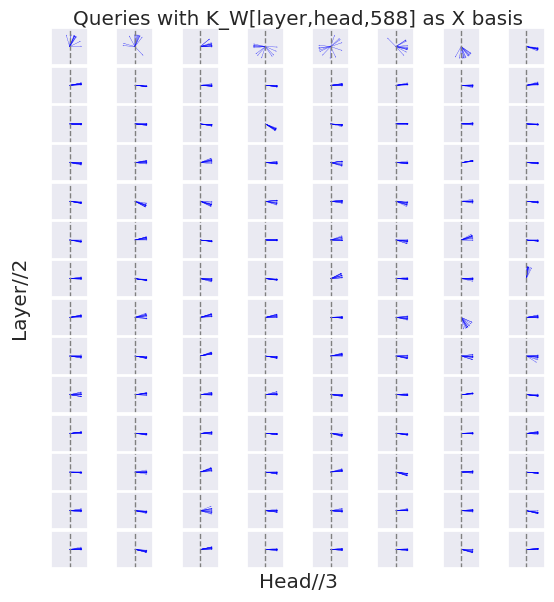

In [ ]:
def get_param(name):
  found=False
  for n,v in model.named_parameters():
    if n==name:
      found = True
      break
  assert found
  return v.detach().cpu().numpy()

def plot_2d_vectors_in_subplot(vectors, row, col, rows, cols, fig=None, axs=None, color='blue'):
    ax = axs[row][col]
    origin = np.zeros((2, len(vectors)))
    vectors = np.array(vectors).T  # shape: (2, N)

    ax.quiver(*origin, *vectors, angles='xy', scale_units='xy', scale=1, color=color)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.axvline(x=0, linestyle='--', color='gray', linewidth=1)
    return fig, axs

def rotation_matrix_to_first_axis_nd(x):
    """
    Generalized method for any dimension using Householder reflection
    Rotates vector x to align with the first standard basis vector [1,0,0,...,0]

    Args:
        x: N-dimensional vector (numpy array or list)

    Returns:
        NxN rotation matrix (numpy array)
    """
    x = np.array(x, dtype=float)
    n = len(x)

    # Normalize the input vector
    norm = np.linalg.norm(x)
    if norm == 0:
        raise ValueError("Cannot rotate zero vector")

    u = x / norm

    # Create target vector (first standard basis vector)
    target = np.zeros(n)
    target[0] = 1.0

    # Handle special cases
    dot_product = np.dot(u, target)
    if np.isclose(dot_product, 1.0):
        # Already aligned
        return np.eye(n)
    elif np.isclose(dot_product, -1.0):
        # Opposite direction - need 180° rotation
        # Use reflection across hyperplane perpendicular to first axis
        R = np.eye(n)
        R[0, 0] = -1
        return R

    # General case: Use Householder reflection
    # Find vector that when reflected maps u to target
    # We want to reflect u to target, so we find the reflection vector

    # Method 1: Direct Householder to map u to target
    # The reflection vector is: v = (u - target) / ||u - target||
    v = u - target
    v = v / np.linalg.norm(v)

    # Householder reflection matrix: H = I - 2vv^T
    H = np.eye(n) - 2 * np.outer(v, v)

    return H

qs = []
ks = []
def hook(activation, hook: HookPoint):
  if hook.name.endswith("hook_k"):
    ks.append(activation[0, 0, :, :].detach().cpu().numpy())
  else:
    qs.append(activation[0, :, ::3, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_q") or name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

for layer in range(model.cfg.n_layers):
  for head in range(8):
    if layer%2==0:
      k = get_param(f'blocks.{layer}.attn._W_K')[head,MASSIVE_ACT_DIM]
      R_hd = rotation_matrix_to_first_axis_nd(k)
      rotated_k = R_hd @ k
      rotated_k_2d = [rotated_k[0],rotated_k[1]]

      rotated_qs_2d = []
      qs_at_pos = qs[layer][1:,head]
      for q in qs_at_pos:
        rotated_q = R_hd @ q
        q1, q2 = rotated_q[0], rotated_q[1]
        norm = (q1**2+q2**2)**0.5
        rotated_qs_2d.append([q1/norm, q2/norm])
      plot_2d_vectors_in_subplot(rotated_qs_2d, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads, fig=fig, axs=axs)
plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle(f'Queries with K_W[layer,head,{MASSIVE_ACT_DIM}] as X basis')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

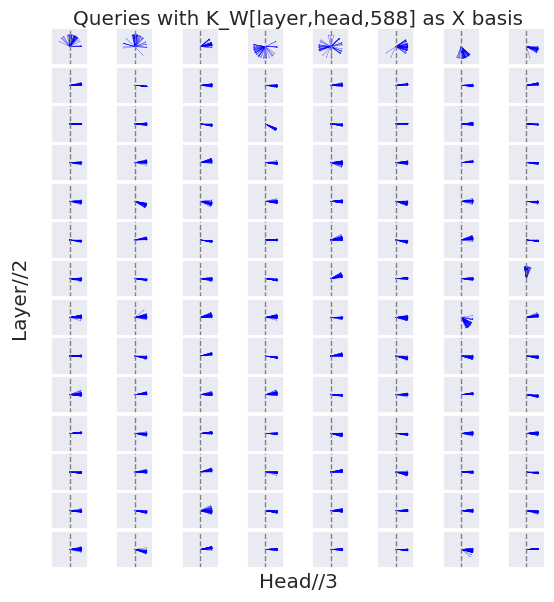

In [ ]:
qs = []
ks = []
def hook(activation, hook: HookPoint):
  if hook.name.endswith("hook_k"):
    ks.append(activation[0, 0, :, :].detach().cpu().numpy())
  else:
    qs.append(activation[0, :, ::3, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_q") or name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [LONG_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

for layer in range(model.cfg.n_layers):
  for head in range(8):
    if layer%2==0:
      k = get_param(f'blocks.{layer}.attn._W_K')[head,MASSIVE_ACT_DIM]
      R_hd = rotation_matrix_to_first_axis_nd(k)
      rotated_k = R_hd @ k
      rotated_k_2d = [rotated_k[0],rotated_k[1]]

      rotated_qs_2d = []
      qs_at_pos = qs[layer][1:,head]
      for q in qs_at_pos:
        rotated_q = R_hd @ q
        q1, q2 = rotated_q[0], rotated_q[1]
        norm = (q1**2+q2**2)**0.5
        rotated_qs_2d.append([q1/norm, q2/norm])
      plot_2d_vectors_in_subplot(rotated_qs_2d, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads, fig=fig, axs=axs)
plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle(f'Queries with K_W[layer,head,{MASSIVE_ACT_DIM}] as X basis')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

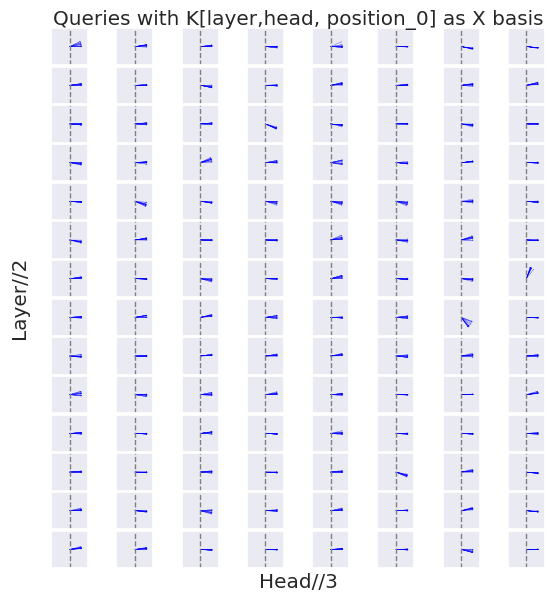

In [ ]:
qs = []
ks = []
def hook(activation, hook: HookPoint):
  if hook.name.endswith("hook_k"):
    ks.append(activation[0, 0, :, :].detach().cpu().numpy())
  else:
    qs.append(activation[0, :, ::3, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_q") or name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

for layer in range(model.cfg.n_layers):
  for head in range(model.cfg.n_heads//3):
    if layer%2==0:
      k = ks[layer][head]
      R_hd = rotation_matrix_to_first_axis_nd(k)
      rotated_k = R_hd @ k
      rotated_k_2d = [rotated_k[0],rotated_k[1]]

      rotated_qs_2d = []
      qs_at_pos = qs[layer][1:,head]
      for q in qs_at_pos:
        rotated_q = R_hd @ q
        q1, q2 = rotated_q[0], rotated_q[1]
        norm = (q1**2+q2**2)**0.5
        rotated_qs_2d.append([q1/norm, q2/norm])
      plot_2d_vectors_in_subplot(rotated_qs_2d, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads, fig=fig, axs=axs)
plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle('Queries with K[layer,head, position_0] as X basis')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

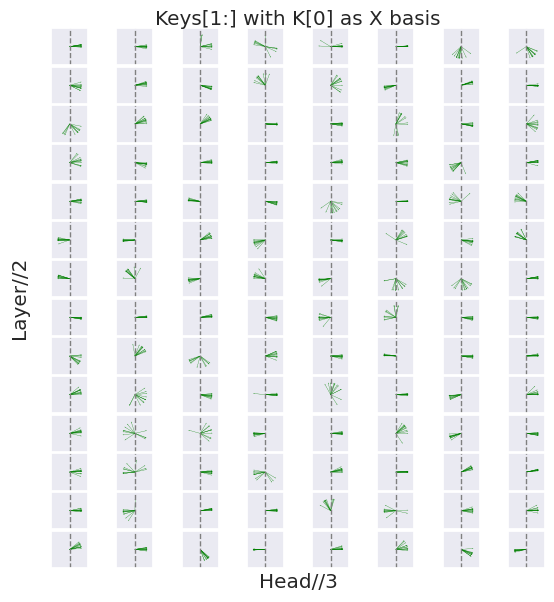

In [ ]:
ks_other = []
ks = []
def hook(activation, hook: HookPoint):
  if hook.name.endswith("hook_k"):
    ks.append(activation[0, 0, :, :].detach().cpu().numpy())
    ks_other.append(activation[0, 1:, :, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

for layer in range(model.cfg.n_layers):
  for head in range(model.cfg.n_heads//3):
    if layer%2==0:
      k = get_param(f'blocks.{layer}.attn._W_K')[head,MASSIVE_ACT_DIM]
      R_hd = rotation_matrix_to_first_axis_nd(k)
      rotated_k = R_hd @ k
      rotated_k_2d = [rotated_k[0],rotated_k[1]]

      rotated_ko_2d = []
      ko_at_pos = ks_other[layer][1:,head]
      for ko in ko_at_pos:
        rotated_ko = R_hd @ ko
        ko1, ko2 = rotated_ko[0], rotated_ko[1]
        norm = (ko1**2+ko2**2)**0.5
        rotated_ko_2d.append([ko1/norm, ko2/norm])
      plot_2d_vectors_in_subplot(rotated_ko_2d, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads, fig=fig, axs=axs, color='green')

plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle(f'Keys[1:] with K[0] as X basis')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

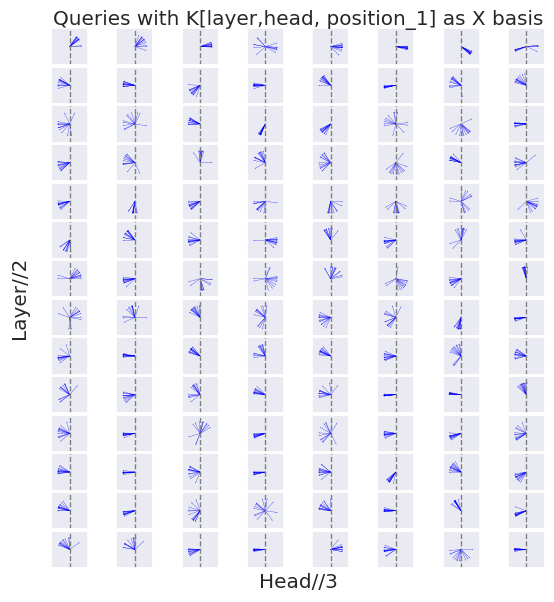

In [ ]:
qs = []
ks = []
def hook(activation, hook: HookPoint):
  if hook.name.endswith("hook_k"):
    ks.append(activation[0, 1, :, :].detach().cpu().numpy())
  else:
    qs.append(activation[0, :, ::3, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_q") or name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

for layer in range(model.cfg.n_layers):
  for head in range(model.cfg.n_heads//3):
    if layer%2==0:
      k = ks[layer][head]
      R_hd = rotation_matrix_to_first_axis_nd(k)
      rotated_k = R_hd @ k
      rotated_k_2d = [rotated_k[0],rotated_k[1]]

      rotated_qs_2d = []
      qs_at_pos = qs[layer][1:,head]
      for q in qs_at_pos:
        rotated_q = R_hd @ q
        q1, q2 = rotated_q[0], rotated_q[1]
        norm = (q1**2+q2**2)**0.5
        rotated_qs_2d.append([q1/norm, q2/norm])
      plot_2d_vectors_in_subplot(rotated_qs_2d, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads//3, fig=fig, axs=axs)
plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle('Queries with K[layer,head, position_1] as X basis')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

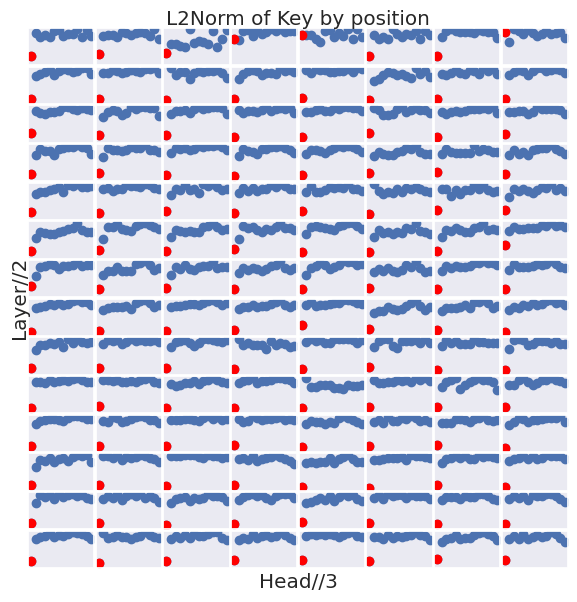

In [ ]:
def plot_in_subplot(vectors, row, col, rows, cols, fig=None, axs=None, colors=None):
    ax = axs[row][col]
    ax.plot(vectors,'o')
    ax.plot(vectors[0:1],'o',color='red')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(bottom=0)
    return fig, axs

#check the magnitude of the key.., and how it compares to the magnitudes of the other keys.
ks = []
def hook(activation, hook: HookPoint):
  ks.append(activation[0, :, :, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_k")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)
#for each layer and head, plot the magnitude of the bos_k and the magnitude of the other keys
rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

mags = []
for layer, layer_ks in enumerate(ks):
  if layer%2==0:
    for head in range(model.cfg.n_heads//3):
      mags = []
      for pos in range(layer_ks.shape[0]):
        mags.append(np.linalg.norm(layer_ks[pos,head]))
      plot_in_subplot(mags, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads//3, fig=fig, axs=axs)
plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle('L2Norm of Key by position')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

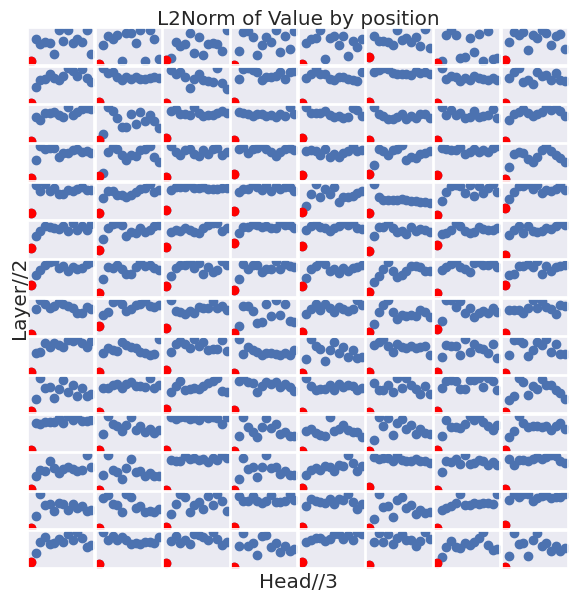

In [ ]:
#check the magnitude of the key.., and how it compares to the magnitudes of the other keys.
ks = []
def hook(activation, hook: HookPoint):
  ks.append(activation[0, :, :, :].detach().cpu().numpy())
filter = lambda name: name.endswith(f"attn.hook_v")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)
#for each layer and head, plot the magnitude of the bos_k and the magnitude of the other keys
rows, cols = model.cfg.n_layers//2, model.cfg.n_heads//3
fig, axs = plt.subplots(rows, cols, figsize=(6,6))

mags = []
for layer, layer_ks in enumerate(ks):
  if layer%2==0:
    for head in range(model.cfg.n_heads//3):
      mags = []
      for pos in range(layer_ks.shape[0]):
        mags.append(np.linalg.norm(layer_ks[pos,head]))
      plot_in_subplot(mags, layer//2, head, model.cfg.n_layers//2, model.cfg.n_heads//3, fig=fig, axs=axs)
plt.tight_layout(pad=0.1)
fig.subplots_adjust(top=0.95, left=0.05, bottom=0.05, right=0.95)
fig.suptitle('L2Norm of Value by position')
fig.supxlabel('Head//3')
fig.supylabel('Layer//2')
plt.show()

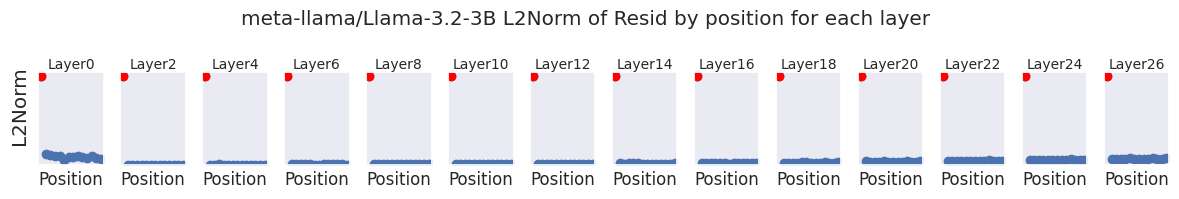

In [ ]:
#why is this done by a sparse residual stream? Couldn't be still shift queries towards any arbitrary key from a dense residual stream?
def plot_in_subplot_1d(vectors, col, cols, fig=None, axs=None, colors=None):
    ax = axs[col]
    ax.plot(vectors,'o')
    ax.plot(vectors[0:1],'o',color='red')
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_xticklabels([])
    ax.set_xlabel('Position')
    ax.set_yticklabels([])
    ax.set_ylim(bottom=0)
    ax.set_title(f"Layer{col*2}", fontsize=10, pad=2)
    return fig, axs

ks = []
def hook(activation, hook: HookPoint):
  ks.append(activation[0].detach().cpu().numpy())
filter = lambda name: name.endswith(f"resid_post")

model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

rows=model.cfg.n_layers//2
fig, axs = plt.subplots(1,rows, figsize=(12,2))
mags = []
for layer, layer_ks in enumerate(ks):
  if layer%2==0:
      mags = []
      for pos in range(layer_ks.shape[0]):
        mags.append(np.linalg.norm(layer_ks[pos]))
      plot_in_subplot_1d(mags, layer//2, model.cfg.n_layers//2, fig=fig, axs=axs)
fig.suptitle(f'{MODEL_NAME} L2Norm of Resid by position for each layer')

fig.supylabel('L2Norm')
fig.subplots_adjust(top=0.95, left=0.2, bottom=0.2, right=0.95)
plt.tight_layout(pad=1)
plt.show()

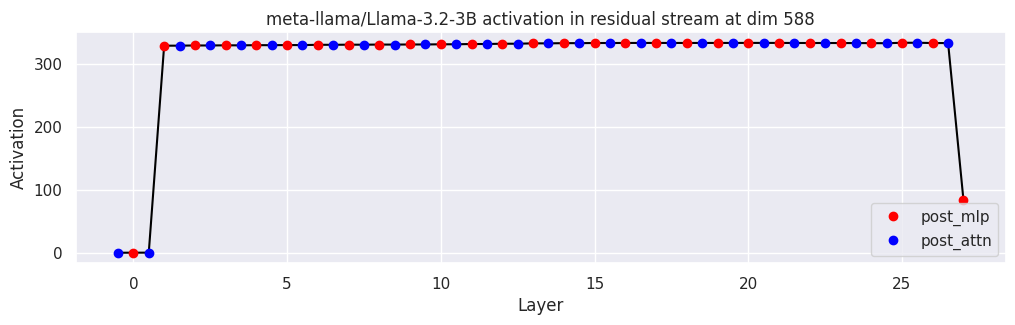

In [ ]:
#show how the residual stream activation changes by layer.
post_mlp = []
post_att = []
def hook(activation, hook: HookPoint):
    if hook.name.endswith('resid_post'):
      post_mlp.append(activation[0][0,MASSIVE_ACT_DIM].detach().cpu().item())
    else:
      post_att.append(activation[0][0,MASSIVE_ACT_DIM].detach().cpu().item())
filter = lambda name: name.endswith("resid_post") or name.endswith("resid_mid")
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

plt.figure(figsize=(12,3),dpi=100)
mlp_idx = list(range(model.cfg.n_layers))
attn_idx = [x-0.5 for x in mlp_idx]
all_data = []
all_idx = []
for a,b,c,d in zip(post_att, post_mlp, attn_idx, mlp_idx):
  all_data.append(a)
  all_data.append(b)
  all_idx.append(c)
  all_idx.append(d)
plt.plot(all_idx, all_data, color='black')

plt.plot(mlp_idx,post_mlp, 'o',color='red',label='post_mlp')
plt.plot(attn_idx,post_att, 'o',color='blue',label='post_attn')

plt.legend()
plt.title(f'{MODEL_NAME} activation in residual stream at dim {MASSIVE_ACT_DIM}')
plt.xlabel('Layer')
plt.ylabel('Activation')
plt.show()

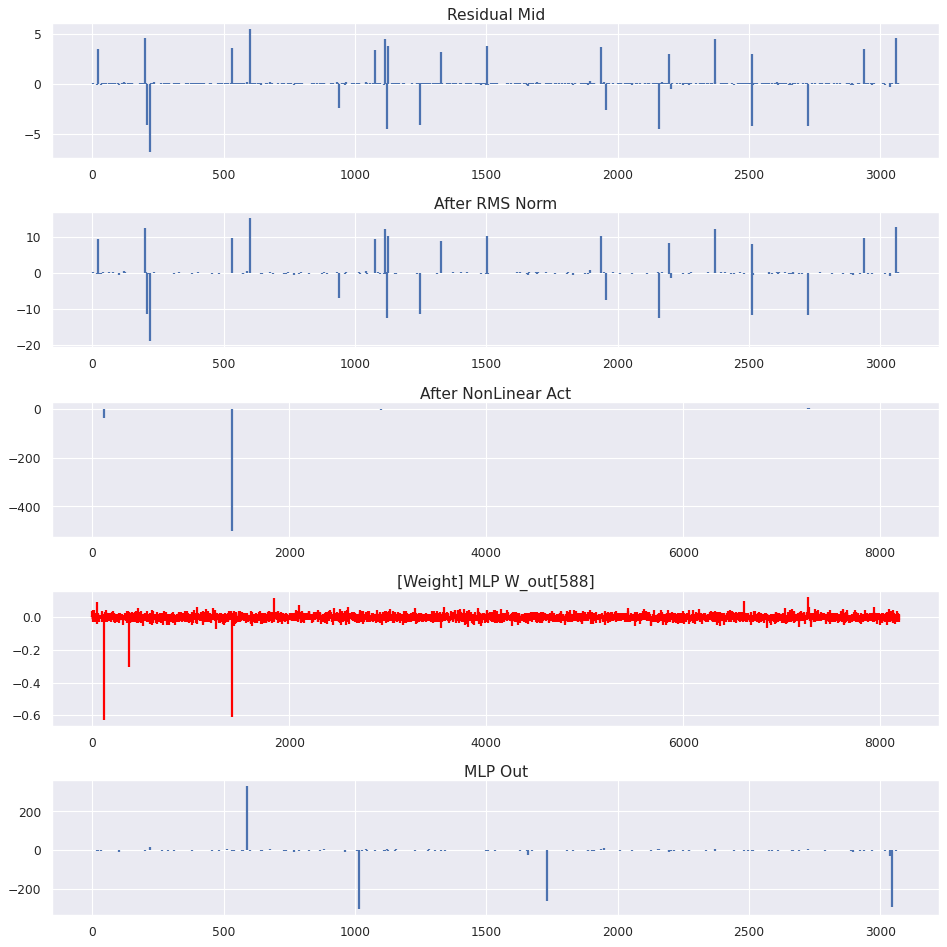

In [ ]:
#show how the residual stream activation changes by layer.
# #gated MLP and RMS with pre and post norm.
# 'blocks.12.hook_resid_mid' # residual stream right before MLP
# 'blocks.12.ln2.hook_normalized' #residuals stream/RMS

# 'blocks.12.mlp.hook_pre'  #after matmul W_gate, dim_mlp
# 'blocks.12.mlp.hook_pre_linear' #after matmul W_in, dim_mlp
# 'blocks.12.mlp.hook_post' #after act func and combine hook_pre hook_pre_linear, dim_mlp

# 'blocks.12.ln2_post.hook_scale' #amount to scale mlp_out by
# 'blocks.12.ln2_post.hook_normalized' #result after x/hook_scale

# 'blocks.12.hook_mlp_out' #what gets added back to resid, result after multiplying by W

activations = {}
def hook(activation, hook: HookPoint):
    activations[hook.name] = activation[0,0].detach().cpu().numpy()
hook_names = ['blocks.1.hook_resid_mid','blocks.1.ln2.hook_normalized','blocks.1.mlp.hook_pre',
              'blocks.1.mlp.hook_pre_linear','blocks.1.mlp.hook_post','blocks.1.ln2_post.hook_scale',
              'blocks.1.ln2_post.hook_normalized','blocks.1.hook_mlp_out']
filter = lambda name: name in hook_names
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

param_dict = {}
params = ['blocks.1.mlp.W_out','blocks.1.ln2_post.w']
for n,v in model.named_parameters():
  if n in params:
    param_dict[n]=v.detach().cpu().numpy()

fig, axes = plt.subplots(5, figsize=(12, 12), dpi=80)

axes[0].vlines(x=list(range(len(activations['blocks.1.hook_resid_mid']))), ymin=0, ymax=activations['blocks.1.hook_resid_mid'], linewidth=2)
axes[0].set_title(f"Residual Mid", fontsize=14, pad=2)

axes[1].vlines(x=list(range(len(activations['blocks.1.ln2.hook_normalized']))), ymin=0, ymax=activations['blocks.1.ln2.hook_normalized'], linewidth=2)
axes[1].set_title(f"After RMS Norm", fontsize=14, pad=2)

axes[2].vlines(x=list(range(len(activations['blocks.1.mlp.hook_post']))), ymin=0, ymax=activations['blocks.1.mlp.hook_post'], linewidth=2)
axes[2].set_title(f"After NonLinear Act", fontsize=14, pad=2)

axes[3].vlines(x=list(range(len(param_dict['blocks.1.mlp.W_out'][:,MASSIVE_ACT_DIM]))), color='red',ymin=0, ymax=param_dict['blocks.1.mlp.W_out'][:,MASSIVE_ACT_DIM], linewidth=2)
axes[3].set_title(f"[Weight] MLP W_out[{MASSIVE_ACT_DIM}]", fontsize=14, pad=2)

axes[4].vlines(x=list(range(len(activations['blocks.1.hook_mlp_out']))), ymin=0, ymax=activations['blocks.1.hook_mlp_out'], linewidth=2)
axes[4].set_title(f"MLP Out", fontsize=14, pad=2)


plt.tight_layout()
plt.show()

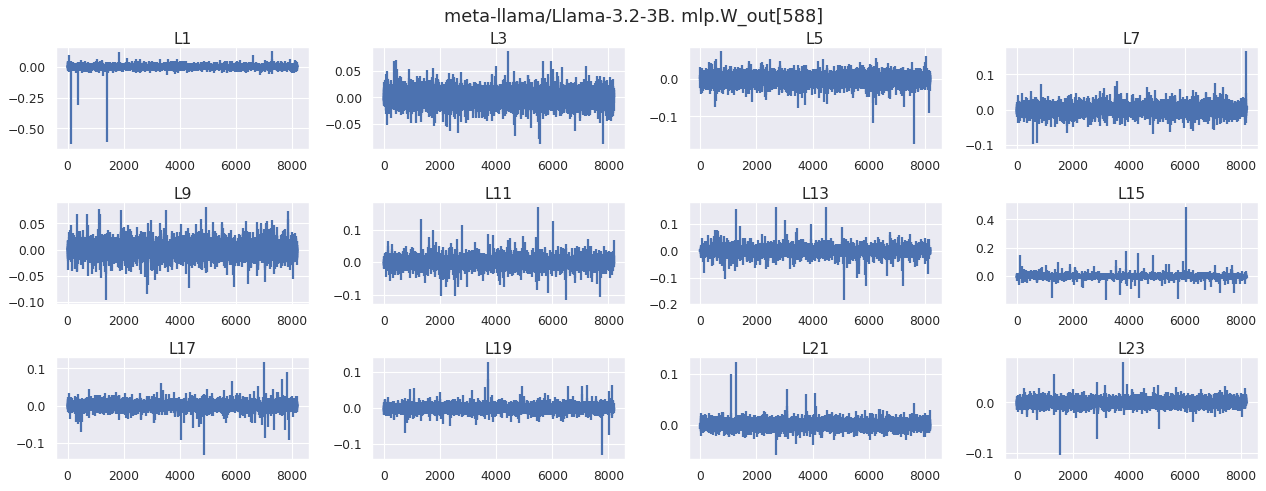

In [ ]:
params = []
param = 'mlp.W_out'
for n,v in model.named_parameters():
  if n.endswith(param):
    params.append(v[:,MASSIVE_ACT_DIM].detach().cpu().numpy())

fig, axes = plt.subplots(3,4, figsize=(16,6), dpi=80)
axes = axes.flatten()
x = list(range(len(params[0])))
for idx, p in enumerate(params):
  if idx%2==1 and idx<24:
    axes[idx//2].vlines(x=x, ymin=0, ymax=p, linewidth=2)
    axes[idx//2].set_title(f"L{idx}", fontsize=14, pad=2)

plt.tight_layout()
fig.suptitle(f"{MODEL_NAME}. mlp.W_out[{MASSIVE_ACT_DIM}]", fontsize=16, y=1.02)
plt.show()

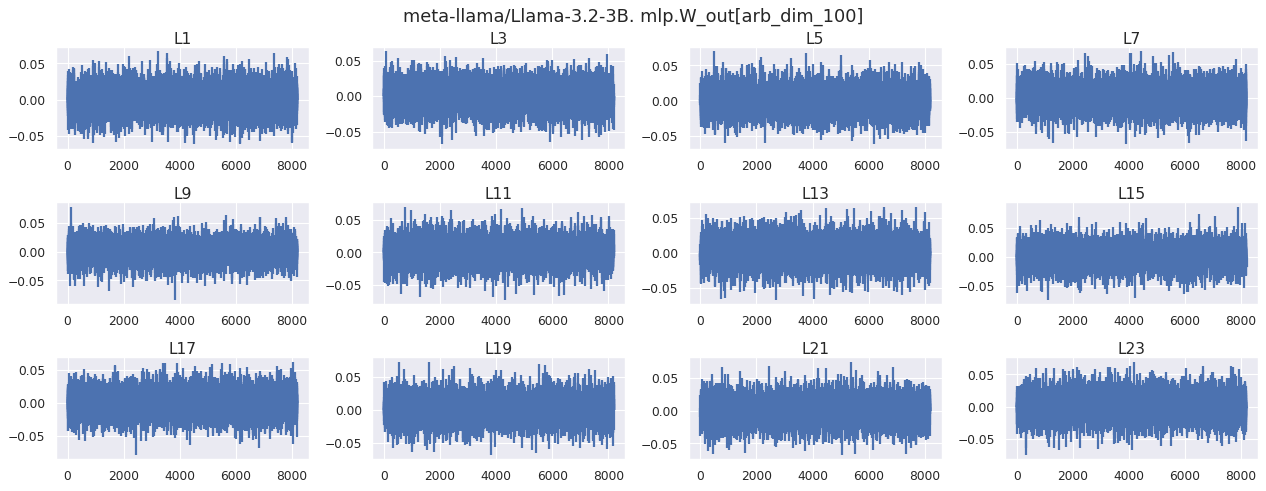

In [ ]:
params = []
param = 'mlp.W_out'
for n,v in model.named_parameters():
  if n.endswith(param):
    params.append(v[:,100].detach().cpu().numpy())

fig, axes = plt.subplots(3,4, figsize=(16,6), dpi=80)
axes = axes.flatten()
x = list(range(len(params[0])))
for idx, p in enumerate(params):
  if idx%2==1 and idx<24:
    axes[idx//2].vlines(x=x, ymin=0, ymax=p, linewidth=2)
    axes[idx//2].set_title(f"L{idx}", fontsize=14, pad=2)

plt.tight_layout()
fig.suptitle(f"{MODEL_NAME}. mlp.W_out[arb_dim_100]", fontsize=16, y=1.02)
plt.show()

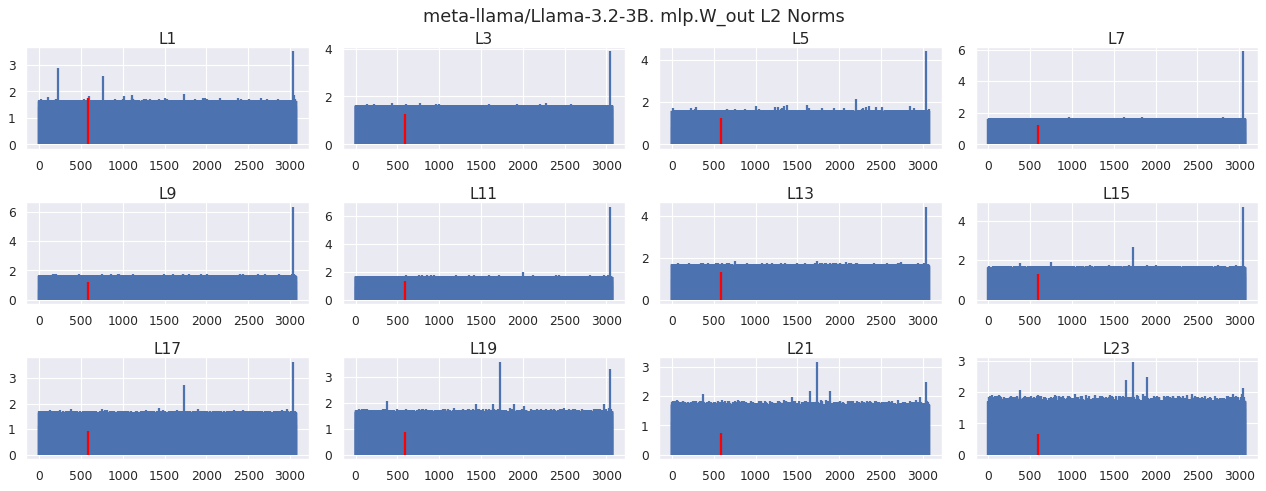

In [ ]:
#look at the norms of each dimension in W
params = []
param = 'mlp.W_out'
for n,v in model.named_parameters():
  if n.endswith(param):
    params.append(v.detach().cpu().numpy())
params[0].shape
fig, axes = plt.subplots(3,4, figsize=(16,6), dpi=80)
axes = axes.flatten()
x = list(range(params[0].shape[1]))
for idx, p in enumerate(params):
  if idx%2==1 and idx<24:
    axes[idx//2].vlines(x=x, ymin=0, ymax=np.linalg.norm(p, axis=0), linewidth=2)
    axes[idx//2].vlines(x=x[MASSIVE_ACT_DIM], ymin=0, ymax=np.linalg.norm(p, axis=0)[MASSIVE_ACT_DIM], linewidth=2, color='red')
    axes[idx//2].set_title(f"L{idx}", fontsize=14, pad=2)

plt.tight_layout()
fig.suptitle(f"{MODEL_NAME}. mlp.W_out L2 Norms", fontsize=16, y=1.02)
plt.show()

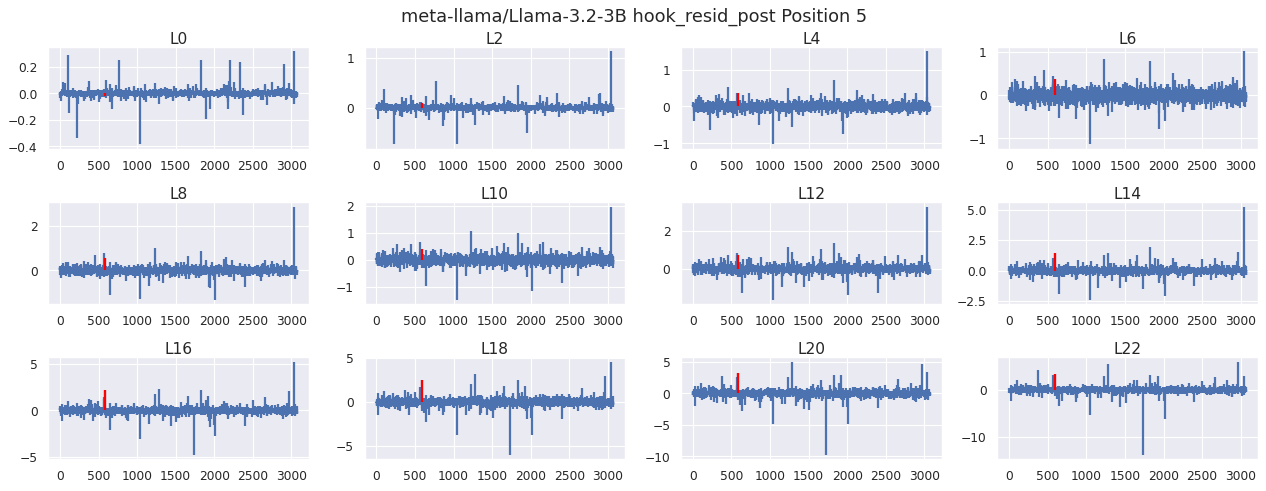

In [ ]:
#are there side effects on other positions residual stream?
#load the params.
#show how the residual stream activation changes by layer.
activations = []
position=5
def hook(activation, hook: HookPoint):
    activations.append(activation[0][position].detach().cpu().numpy())
hook_name ='hook_resid_post'
filter = lambda name: name.endswith(hook_name)
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

fig, axes = plt.subplots(3,4, figsize=(16,6), dpi=80)
axes = axes.flatten()
x = list(range(len(activations[0])))
for idx, a in enumerate(activations):
  if idx%2==0 and idx<24:
    axes[idx//2].vlines(x=x, ymin=0, ymax=a, linewidth=2)
    axes[idx//2].vlines(x=x[MASSIVE_ACT_DIM], ymin=0, ymax=a[MASSIVE_ACT_DIM], linewidth=2, color='red')
    axes[idx//2].set_title(f"L{idx}", fontsize=14, pad=2)
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME} hook_resid_post Position 5", fontsize=16, y=1.02)
plt.show()

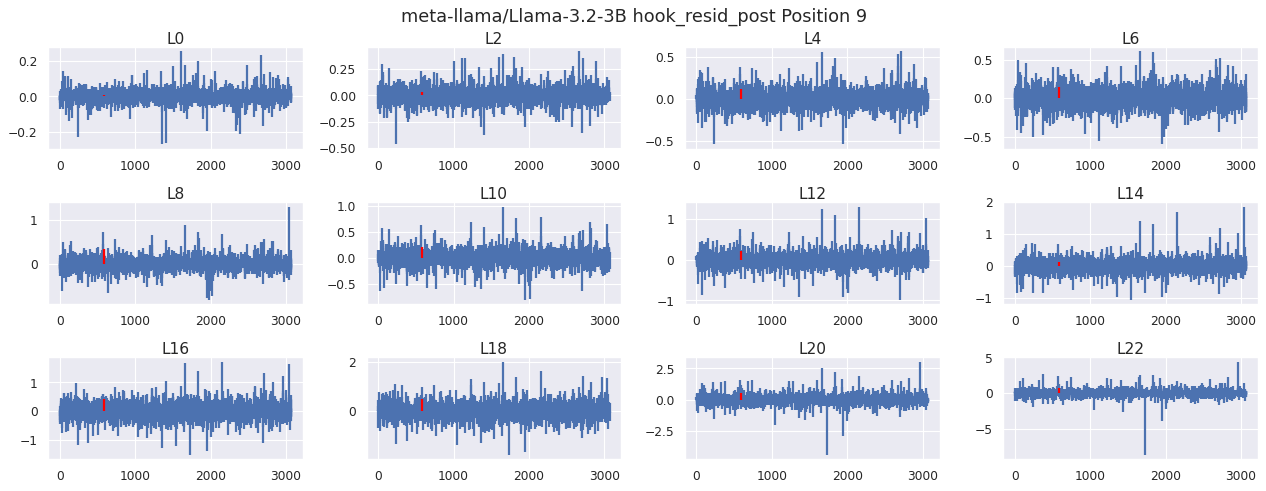

In [ ]:
#are there side effects on other positions residual stream?
#load the params.
#show how the residual stream activation changes by layer.
activations = []
position=9
def hook(activation, hook: HookPoint):
    activations.append(activation[0][position].detach().cpu().numpy())
hook_name ='hook_resid_post'
filter = lambda name: name.endswith(hook_name)
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

fig, axes = plt.subplots(3,4, figsize=(16,6), dpi=80)
axes = axes.flatten()
x = list(range(len(activations[0])))
for idx, a in enumerate(activations):
  if idx%2==0 and idx<24:
    axes[idx//2].vlines(x=x, ymin=0, ymax=a, linewidth=2)
    axes[idx//2].vlines(x=x[MASSIVE_ACT_DIM], ymin=0, ymax=a[MASSIVE_ACT_DIM], linewidth=2, color='red')
    axes[idx//2].set_title(f"L{idx}", fontsize=14, pad=2)
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME} hook_resid_post Position 9", fontsize=16, y=1.02)
plt.show()

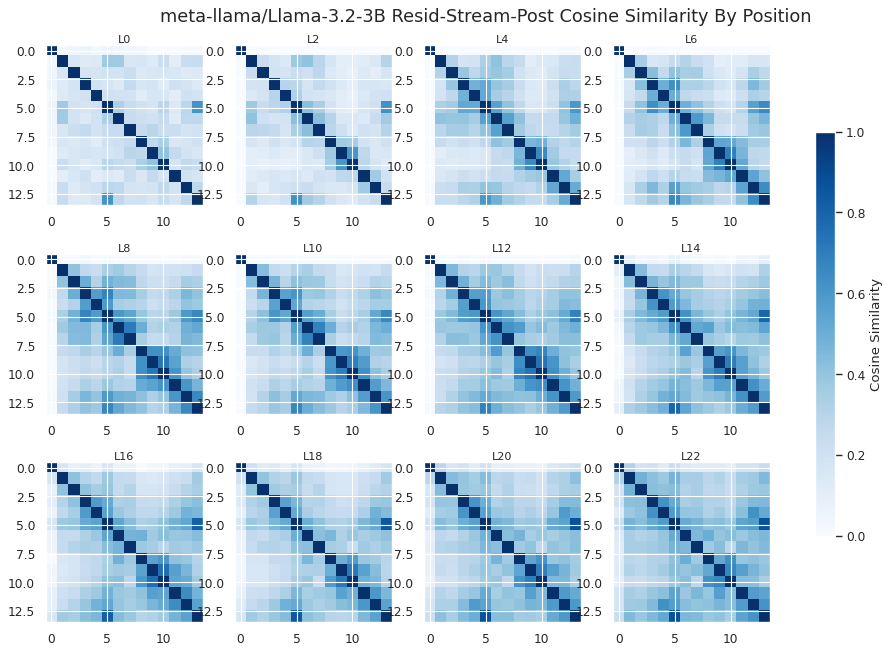

In [ ]:
#what is going on here?
#its like the residual streams have convered to the same value at every position...
#get the cosin similarity between every position and eveyr other position at each layer.
#so I will have a 2d plot for each layer.

#are there side effects on other positions residual stream?
#load the params.
#show how the residual stream activation changes by layer.
def sim(x,y):
  return sum(x*y)/np.linalg.norm(x)/np.linalg.norm(y)

activations = []
def hook(activation, hook: HookPoint):
    activations.append(activation[0].detach().cpu().numpy())
filter = lambda name: name.endswith('hook_resid_post')
model.run_with_hooks(
    [SHORT_PROMPT],
    return_type=None,
    fwd_hooks=[(filter, hook)],
)

fig, axes = plt.subplots(3, 4, figsize=(12, 8), dpi=80)
axes = axes.flatten()

for idx, layer in enumerate(activations):
  if idx%2==0 and idx<24:
    data = []
    for x in range(layer.shape[0]):
      row = []
      for y in range(layer.shape[0]):
        row.append(sim(layer[x],layer[y]))
      data.append(row)
    ax = axes[idx//2]
    im = ax.imshow(data, aspect='auto', cmap='Blues', vmin=0, vmax=1)
    ax.set_title(f"L{idx}", fontsize=10, pad=2)
plt.tight_layout()
fig.suptitle(f"{MODEL_NAME} Resid-Stream-Post Cosine Similarity By Position", fontsize=16, y=1.02)
fig.colorbar(im, ax=axes, location='right', shrink=0.7, label='Cosine Similarity')
plt.show()

In [ ]:
model.to_str_tokens(SHORT_PROMPT)

['<|begin_of_text|>',
 'The',
 ' sale',
 ' ends',
 ' today',
 '.',
 ' You',
 ' won',
 "'t",
 ' want',
 ' to',
 ' miss',
 ' it',
 '!']

In [ ]:
tokens = model.to_tokens(SHORT_PROMPT)
logits = model(tokens)
probs = F.softmax(logits, dim=-1)
top_probs, top_indices = probs.topk(5, dim=-1)
decoded_top_preds = [
    [model.to_string(tok.item()) for tok in pos_top]
    for pos_top in top_indices[0]
]

for i, (token, top5) in enumerate(zip(model.to_str_tokens(SHORT_PROMPT), decoded_top_preds)):
    print(f"Position {i} (input: '{token}'): top predictions -> {top5}")

Position 0 (input: '<|begin_of_text|>'): top predictions -> ['Question', 'def', '#', 'The', 'Tags']
Position 1 (input: 'The'): top predictions -> [' ', ' following', ' first', ' new', ' Best']
Position 2 (input: ' sale'): top predictions -> [' of', ' is', ' price', ' will', ' and']
Position 3 (input: ' ends'): top predictions -> [' on', ' in', ' at', ' ', ' today']
Position 4 (input: ' today'): top predictions -> [',', ' at', '.', '!', ' (']
Position 5 (input: '.'): top predictions -> [' I', ' If', ' The', ' Get', ' Don']
Position 6 (input: ' You'): top predictions -> [' can', ' have', ' will', ' still', ' must']
Position 7 (input: ' won'): top predictions -> ["'t", '’t', '&apos', 'â', ' a']
Position 8 (input: ''t'): top predictions -> [' want', ' believe', ' find', ' be', ' regret']
Position 9 (input: ' want'): top predictions -> [' to', ' miss', ' this', ' the', ' it']
Position 10 (input: ' to'): top predictions -> [' miss', ' wait', ' pass', ' be', ' let']
Position 11 (input: ' miss

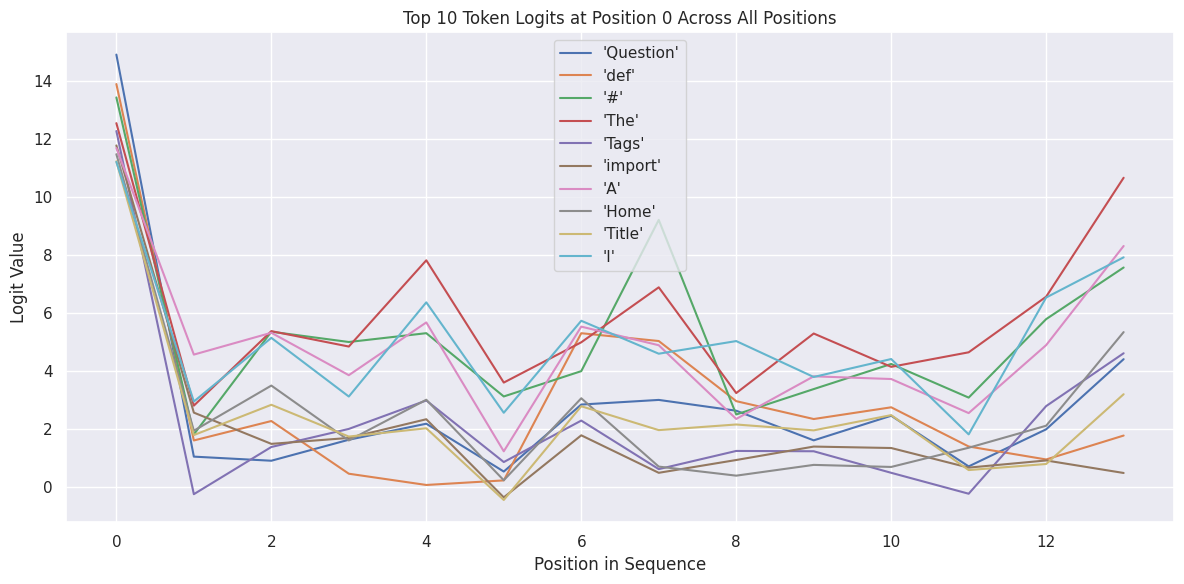

In [ ]:
tokens = model.to_tokens(SHORT_PROMPT)
logits = model(tokens)
# Remove batch dim
logits = logits[0]

# Get top 10 token indices by logit value at position 0
topk_vals, topk_indices = logits[0].topk(10)

# For each of these tokens, collect logits across all positions
logits_over_positions = logits[:, topk_indices]  # shape: (seq_len, 10)

# Plot
plt.figure(figsize=(12, 6))
for i in range(10):
    token_str = model.to_string(topk_indices[i].item()).strip()
    plt.plot(logits_over_positions[:, i].detach().cpu().numpy(), label=f"'{token_str}'")

plt.xlabel("Position in Sequence")
plt.ylabel("Logit Value")
plt.title("Top 10 Token Logits at Position 0 Across All Positions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

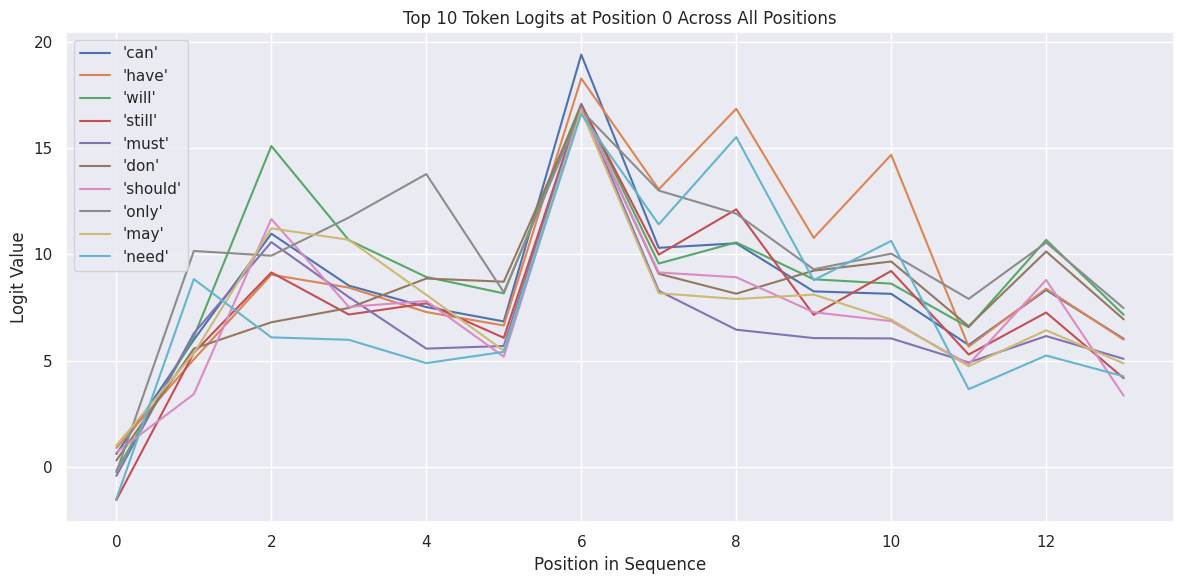

In [ ]:
tokens = model.to_tokens(SHORT_PROMPT)
logits = model(tokens)
# Remove batch dim
logits = logits[0]

# Get top 10 token indices by logit value at position 0
topk_vals, topk_indices = logits[6].topk(10)

# For each of these tokens, collect logits across all positions
logits_over_positions = logits[:, topk_indices]  # shape: (seq_len, 10)

# Plot
plt.figure(figsize=(12, 6))
for i in range(10):
    token_str = model.to_string(topk_indices[i].item()).strip()
    plt.plot(logits_over_positions[:, i].detach().cpu().numpy(), label=f"'{token_str}'")

plt.xlabel("Position in Sequence")
plt.ylabel("Logit Value")
plt.title("Top 10 Token Logits at Position 0 Across All Positions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()